In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, f1_score, recall_score, precision_score, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_csv('drug200.csv')

In [3]:
data.iloc[:, 2:4] = data.iloc[:, 2:4].replace({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})
data['Sex'] = data['Sex'].map({'M': 0, 'F': 1})
data['Drug'] = data['Drug'].replace({'drugY': 4, 'drugC': 2, 'drugX': 3, 'drugA': 0, 'drugB': 1})

C:\Users\rayaf\AppData\Local\Temp\ipykernel_17432\1831665457.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.iloc[:, 2:4] = data.iloc[:, 2:4].replace({'LOW': 0, 'NORMAL': 1, 'HIGH': 2})
C:\Users\rayaf\AppData\Local\Temp\ipykernel_17432\1831665457.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Drug'] = data['Drug'].replace({'drugY': 4, 'drugC': 2, 'drugX': 3, 'drugA': 0, 'drugB': 1})


In [4]:
X = data.loc[:, 'Age':'Na_to_K']
y = data['Drug']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [6]:
print(f'X shape: {X.shape} , y shape: {y.shape}')
print(f'X_train shape: {X_train.shape}'
      f'\nX_test shape: {X_test.shape}'
      f'\ny_train shape: {y_train.shape}'
      f'\ny_test shape: {y_test.shape}')

X shape: (200, 5) , y shape: (200,)
X_train shape: (140, 5)
X_test shape: (60, 5)
y_train shape: (140,)
y_test shape: (60,)


In [7]:
scaler= StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-0.39487045, -0.98581488,  1.14132887,  0.98581488, -0.92108742],
       [ 0.32541441, -0.98581488,  1.14132887, -1.01438923, -0.68208928],
       [-0.87506035, -0.98581488,  1.14132887, -1.01438923,  0.13298123],
       [-0.1547755 , -0.98581488, -1.27967176,  0.98581488, -0.10800975],
       [-0.51491792,  1.01438923,  1.14132887, -1.01438923,  0.99018601],
       [ 1.58591291, -0.98581488, -1.27967176,  0.98581488,  0.02494097],
       [-1.77541642, -0.98581488, -1.27967176,  0.98581488, -0.58771419],
       [-1.65536894,  1.01438923,  1.14132887, -1.01438923,  1.15886546],
       [-0.1547755 , -0.98581488, -1.27967176, -1.01438923,  0.4602336 ],
       [-0.93508409,  1.01438923, -0.06917145,  0.98581488, -0.81020025],
       [ 0.26539067,  1.01438923, -0.06917145, -1.01438923, -0.54657633],
       [ 0.38543815, -0.98581488, -1.27967176, -1.01438923,  2.38958491],
       [ 0.08531946,  1.01438923, -1.27967176,  0.98581488, -0.86372217],
       [-0.6349654 , -0.98581488, -1.2

In [8]:
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'max_features': ['sqrt', 'log2']}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')

In [9]:
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [26]:
label_map = {
    4: 'drugY',
    2: 'drugC',
    3: 'drugX',
    0: 'drugA',
    1: 'drugB'
}

labels = [label_map[i] for i in best_rf.classes_]
print(classification_report(y_test, y_pred_rf, target_names=labels))

              precision    recall  f1-score   support

       drugA       0.88      1.00      0.93         7
       drugB       1.00      0.80      0.89         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        16
       drugY       1.00      1.00      1.00        27

    accuracy                           0.98        60
   macro avg       0.97      0.96      0.96        60
weighted avg       0.99      0.98      0.98        60



In [28]:
cm = confusion_matrix(y_test, y_pred_rf)
cm

array([[ 7,  0,  0,  0,  0],
       [ 1,  4,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0, 16,  0],
       [ 0,  0,  0,  0, 27]])

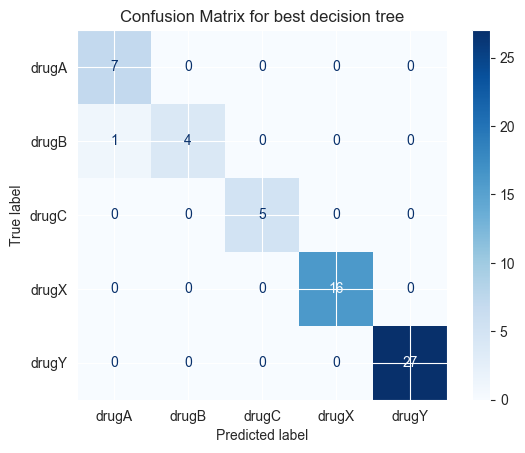

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

dsply = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=labels
)
dsply.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for best decision tree')
plt.show()

In [30]:
y_train_pred = best_rf.predict(X_train)
print(classification_report(y_train, y_train_pred, target_names=labels))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        16
       drugB       1.00      1.00      1.00        11
       drugC       1.00      1.00      1.00        11
       drugX       1.00      1.00      1.00        38
       drugY       1.00      1.00      1.00        64

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

